# Regression

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("medical-facility-location.csv")

In [3]:
df

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수
0,강남구,81053206.0,10,201,93867
1,서초구,80510746.0,5,141,76176
2,용산구,69795335.0,2,66,27345
3,송파구,55703664.0,4,257,106008
4,성동구,52498140.0,2,114,38125
5,종로구,52233029.0,6,49,17365
6,마포구,51249929.0,1,131,51366
7,중구,49499323.0,3,59,12773
8,양천구,49391500.0,5,101,79006
9,영등포구,47450278.0,6,136,48396


In [5]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

Mean Squared Error: 1436.614392693839
회귀 계수: [0.00171956]
절편: 33.005489586830464


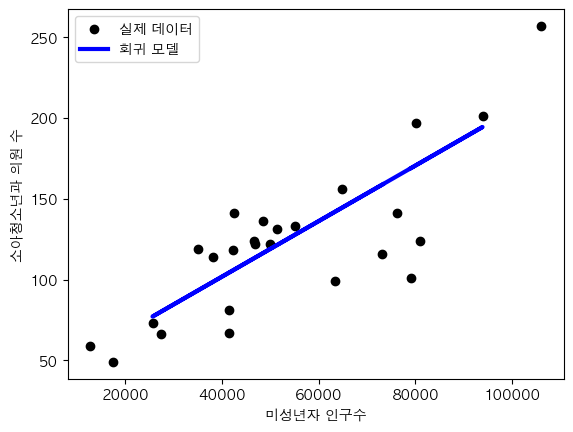

In [6]:
X = df[['미성년자인구수']]
y = df['소아청소년과 의원 수']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 학습된 모델의 회귀 계수와 절편 확인
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

# 시각화
plt.scatter(X, y, color='black', label='실제 데이터')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='회귀 모델')
plt.xlabel('미성년자 인구수')
plt.ylabel('소아청소년과 의원 수')
plt.legend()
plt.show()

In [7]:
y

0     201
1     141
2      66
3     257
4     114
5      49
6     131
7      59
8     101
9     136
10     67
11    116
12    122
13     99
14    141
15    124
16    197
17    118
18    133
19    156
20     81
21    122
22    124
23     73
24    119
Name: 소아청소년과 의원 수, dtype: int64

In [8]:
from scipy.stats import shapiro
print(shapiro(y-np.mean(y)))

ShapiroResult(statistic=0.9170117378234863, pvalue=0.04382031038403511)


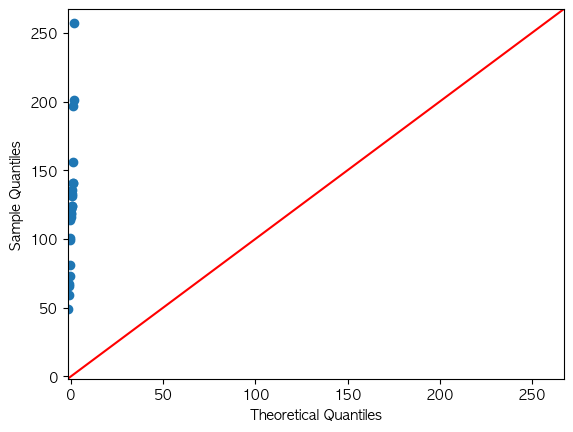

In [9]:
fig = sm.qqplot(y, line='45')
plt.show()

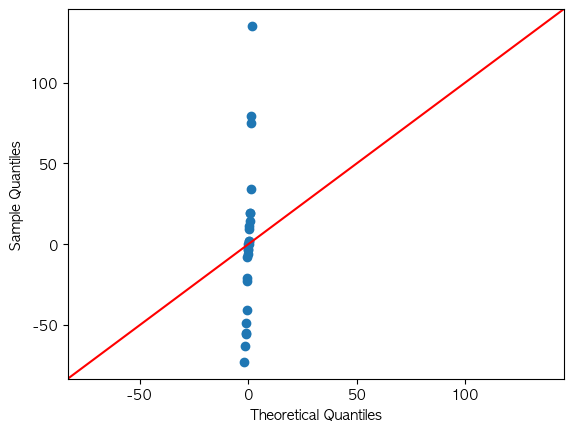

In [10]:
fig = sm.qqplot(y-np.mean(y), line='45')
plt.show()

(array([4., 2., 2., 9., 4., 1., 0., 2., 0., 1.]),
 array([-72.88, -52.08, -31.28, -10.48,  10.32,  31.12,  51.92,  72.72,
         93.52, 114.32, 135.12]),
 <BarContainer object of 10 artists>)

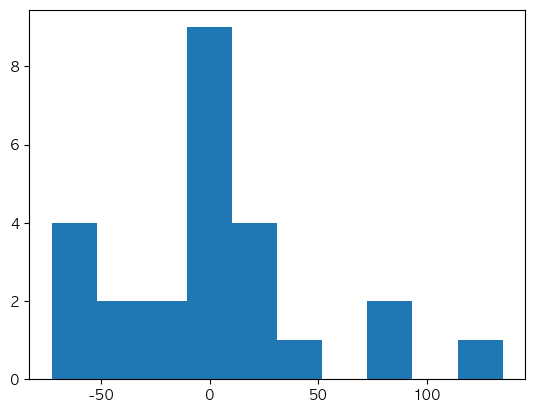

In [11]:
plt.hist(y-np.mean(y))

In [13]:
# 평균을 구하고
# redisual 
import numpy as np

np.mean(y)

121.88

In [14]:
y-np.mean(y)

0      79.12
1      19.12
2     -55.88
3     135.12
4      -7.88
5     -72.88
6       9.12
7     -62.88
8     -20.88
9      14.12
10    -54.88
11     -5.88
12      0.12
13    -22.88
14     19.12
15      2.12
16     75.12
17     -3.88
18     11.12
19     34.12
20    -40.88
21      0.12
22      2.12
23    -48.88
24     -2.88
Name: 소아청소년과 의원 수, dtype: float64

0.016106626018881798
잔차는 정규 분포를 따르지 않습니다.


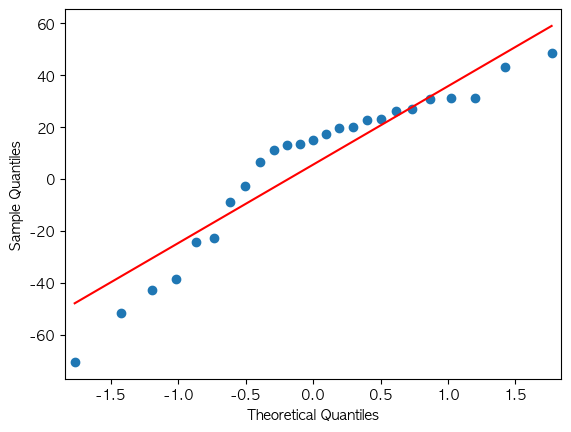

In [15]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

# 회귀 모델 학습
model = sm.OLS(y, X)
results = model.fit()

# 잔차 추출
residuals = results.resid

# 잔차 정규성 확인 - 잔차 플롯
sm.qqplot(residuals, line='s')

# 잔차 정규성 확인 - 정규성 검정
_, p_value = stats.shapiro(residuals)
alpha = 0.05  # 유의수준 설정

print(p_value)
if p_value > alpha:
    print("잔차는 정규 분포를 따릅니다.")
else:
    print("잔차는 정규 분포를 따르지 않습니다.")

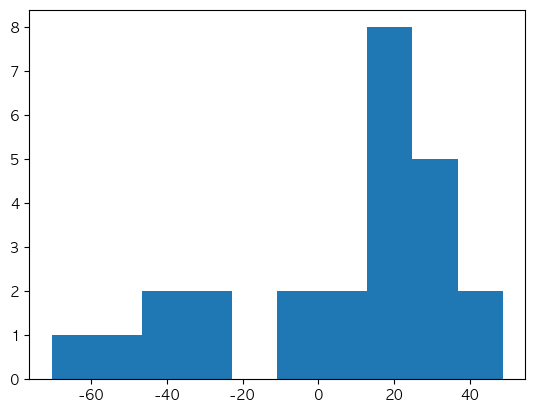

In [16]:
plt.hist(residuals)
fig.savefig('normality-hist.png')

In [17]:
residuals

0     -2.688022
1    -24.299187
2      6.662331
3     26.966443
4     31.270118
5     11.318573
6     19.537623
7     31.283048
8    -70.440185
9     30.982416
10   -22.780096
11   -42.778445
12    13.590762
13   -38.384768
14    48.737465
15   -51.701995
16    23.049166
17    26.086830
18    13.309119
19    15.249617
20    -8.738866
21    20.228683
22    22.625786
23    17.381650
24    43.172774
dtype: float64

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            소아청소년과 의원 수   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              407.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    1.45e-16
Time:                        17:59:23   Log-Likelihood:                         -121.10
No. Observations:                  25   AIC:                                      244.2
Df Residuals:                      24   BIC:                                      245.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
미성년자인구수        0.0022      0.000     20.189      0.000       0.002       0.002
==============================================================================
Omnibus:                        4.822   Durbin-Watson:                   2.450
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.780
Skew:                          -0.953   Prob(JB):                        0.151
Kurtosis:                       2.992   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

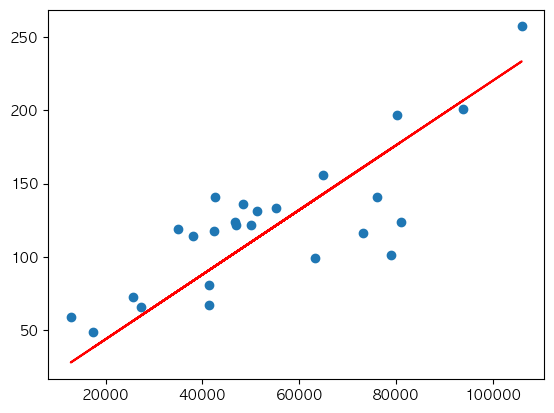

In [19]:
plt.scatter(X, y)
plt.plot(X, 0.0022*X, 'r')
plt.show()

In [20]:
# 입력값으로 50000을 주고 해당하는 소아청소년과 의원 수를 예측
input_value = 50000
predicted_value = 0.0022*input_value
print(f'입력값 {input_value}에 대한 소아청소년과 의원 수 예측: {predicted_value}')


입력값 50000에 대한 소아청소년과 의원 수 예측: 110.0


In [21]:
# 미성년자 인구수 열을 추출하여 2D 배열로 변환
X_values = df[['미성년자인구수']].values

# 예측값 계산
expectations =  0.0022*X_values

# 결과를 "expectation" 컬럼에 추가
df['expectation'] = expectations

In [22]:
df

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수,expectation
0,강남구,81053206.0,10,201,93867,206.5074
1,서초구,80510746.0,5,141,76176,167.5872
2,용산구,69795335.0,2,66,27345,60.1590
3,송파구,55703664.0,4,257,106008,233.2176
4,성동구,52498140.0,2,114,38125,83.8750
5,종로구,52233029.0,6,49,17365,38.2030
6,마포구,51249929.0,1,131,51366,113.0052
7,중구,49499323.0,3,59,12773,28.1006
8,양천구,49391500.0,5,101,79006,173.8132
9,영등포구,47450278.0,6,136,48396,106.4712


In [23]:
# expectation - 소아청소년과 의원의 수 => difference 라는 컬럼을 만듦
df['difference'] = df['expectation'] - df['소아청소년과 의원 수']
df

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수,expectation,difference
0,강남구,81053206.0,10,201,93867,206.5074,5.5074
1,서초구,80510746.0,5,141,76176,167.5872,26.5872
2,용산구,69795335.0,2,66,27345,60.1590,-5.8410
3,송파구,55703664.0,4,257,106008,233.2176,-23.7824
4,성동구,52498140.0,2,114,38125,83.8750,-30.1250
5,종로구,52233029.0,6,49,17365,38.2030,-10.7970
6,마포구,51249929.0,1,131,51366,113.0052,-17.9948
7,중구,49499323.0,3,59,12773,28.1006,-30.8994
8,양천구,49391500.0,5,101,79006,173.8132,72.8132
9,영등포구,47450278.0,6,136,48396,106.4712,-29.5288


In [24]:
import pandas as pd
import json
import folium
import plotly.express as px

with open("secret_key.json") as f: # path 
    secrets = json.loads(f.read())
    
YOUR_GOOGLE_MAPS_API_KEY = secrets['google_api_key']

geo_path = 'skorea_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

fig = px.choropleth(df, geojson=geo_json, locations='자치구', color='difference', color_continuous_scale='Blues',)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='인구수 대비 예상 의원의 수와 실제 의원의 수', title_font_size=20)

# mapbox 설정을 통해 크기 조절
fig.update_layout(
    mapbox=dict(
        style="open-street-map",  # mapbox 스타일 설정
        zoom=10,  # 지도 초기 줌 레벨
        center={"lat": 37.5665, "lon": 126.9780},  # 초기 중심 좌표
    )
)

# 지도 크기 조절
fig.update_layout(height=400, width=600)

# 플롯 표시
fig.show()